In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/microsoft/BingCoronavirusQuerySet/master/data/2020/QueriesByState_2020-10-01_2020-10-31.tsv'
df = pd.read_csv(url, sep='\t', parse_dates=['Date'])

## Data Source Info
This dataset was curated from the Bing search logs (desktop users only). Only searches that were issued many times by multiple users were included. The dataset includes queries from all over the world that had an intent related to the Coronavirus or Covid-19. In some cases this intent is explicit in the query itself (e.g., “Coronavirus updates Seattle”), in other cases it is implicit , e.g. “Shelter in place”. The implicit intent of search queries (e.g., “Toilet paper”) was extracted using random walks on the click graph as outlined in this paper by Microsoft Research. All personal data were removed.

* Specifically this data is targeted only at the Month of October 2020

## Data Dictionary - QueriesByState
Date : string, Date on which the query was issued.

Query : string, The actual search query issued by user(s).

IsImplicitIntent : bool, True if query did not mention covid or coronavirus or sarsncov2 (e.g, “Shelter in place”). False otherwise.

State : string, State from where the query was issued.

Country :string, Country from where the query was issued.

PopularityScore : int, Value between 1 and 100 inclusive. 1 indicates least popular query on the day/State/Country with Coronavirus intent, and 100 indicates the most popular query for the same geogrpahy on the same day.

## Data Update Frequency
New data will be added once a month until coronavirus is no longer in the news.

In [3]:
df.head()

,Date,Query,IsImplicitIntent,State,Country,PopularityScore
0,2020-10-01,morrisons,True,Bournemouth,United Kingdom,22
1,2020-10-01,tgcom,True,Molise,Italy,1
2,2020-10-01,huddersfield examiner,True,Greater Manchester,United Kingdom,2
3,2020-10-01,arizona coronavirus,False,Washington,United States,1
4,2020-10-01,sainsburys,True,Cardiff,United Kingdom,16


In [4]:
df.tail()

,Date,Query,IsImplicitIntent,State,Country,PopularityScore
489649,2020-10-31,protezione civile,True,Friuli-Venezia Giulia,Italy,5
489650,2020-10-31,worldometer coronavirus,False,Bracknell Forest,United Kingdom,15
489651,2020-10-31,attestation,True,Provence-Alpes-Cote D'azur,France,10
489652,2020-10-31,the range,True,Kingston Upon Hull,United Kingdom,35
489653,2020-10-31,nachrichten,True,Hesse,Germany,49


(array([357783.,  51553.,  24124.,  14479.,   9153.,   5142.,   3742.,
          3065.,   2278.,  18335.]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <a list of 10 Patch objects>)

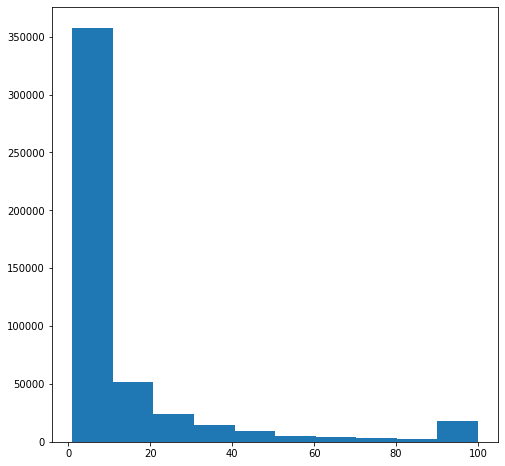

In [5]:
#1 indicates least popular query on the day/State/Country with Coronavirus intent, 
#and 100 indicates the most popular query for the same geogrpahy on the same day.

plt.figure(figsize=(8,8))
plt.hist(df['PopularityScore'])

In [6]:
df['IsImplicitIntent'].value_counts(normalize=True)

True     0.60073
False    0.39927
Name: IsImplicitIntent, dtype: float64

### Quick thoughts
Looks like from an initial peak at the data, 60% of the queries were rated as Implicent Intent. This means that 60% of people were not explicitly searching for Covid-19, and instead were searching for something related to Covid.

Most queries were considered unpopular while under 50k queries were close to a popularity score of 100

In [7]:
df.Country.unique()

array(['United Kingdom', 'Italy', 'United States', 'Australia', 'Belgium',
       'Japan', 'Germany', 'Czech Republic', 'Portugal', 'India', 'Chile',
       'China', 'France', 'Poland', 'Malaysia', 'Peru', 'Denmark',
       'Brazil', 'Latvia', 'Saudi Arabia', 'Spain', 'Korea (South)',
       'Hungary', 'Sweden', 'Colombia', 'Bulgaria', 'El Salvador',
       'Bolivia', 'Mexico', 'Slovak Republic', 'Netherlands', 'Argentina',
       'Philippines', 'Austria', 'Switzerland', 'Turkey', 'Tunisia',
       'Finland', 'Serbia', 'Greece', 'South Africa', 'New Zealand',
       'Thailand', 'Nepal', 'Morocco', 'Croatia', 'Ireland', 'Qatar',
       'Botswana', 'Canada', 'Viet Nam', 'Zimbabwe', 'Panama', 'Namibia',
       'Lithuania', 'Bahrain', 'Barbados', 'Sri Lanka', 'Ethiopia',
       'United Arab Emirates', 'Bangladesh', 'Jamaica', 'Andorra',
       'Norway', 'Nigeria', 'Indonesia', 'Georgia', 'Angola', 'Uganda',
       'Ecuador', 'Singapore', 'Cuba', 'Ghana', 'Jordan', 'Romania',
       'Paragu

#### Checking out top Queries by popularity score in the US

In [8]:
country_value = "United States"
df_country_value = df.loc[df['Country'] == country_value]

df_country_value.sort_values('PopularityScore', ascending = False).head(30)

,Date,Query,IsImplicitIntent,State,Country,PopularityScore
313870,2020-10-21,stimulus update,True,Florida,United States,100
461764,2020-10-30,stimulus update,True,Kansas,United States,100
275283,2020-10-19,stimulus update,True,Minnesota,United States,100
217084,2020-10-15,stimulus update,True,Michigan,United States,100
17855,2020-10-02,hope hicks,True,Arkansas,United States,100
119805,2020-10-08,stimulus update,True,Arizona,United States,100
104726,2020-10-07,stimulus update,True,Louisiana,United States,100
249807,2020-10-17,stimulus update,True,Michigan,United States,100
233280,2020-10-16,stimulus update,True,Nevada,United States,100
249793,2020-10-17,stimulus update,True,New Jersey,United States,100


### Top Query Counts by Country for october

In [10]:
df_country = df.groupby('Country').count()[['Query']]
df_country

,Query
Country,
Afghanistan,1
Albania,1
Algeria,2
Andorra,18
Angola,84
...,...
United States,164877
Uruguay,1
Venezuela,21


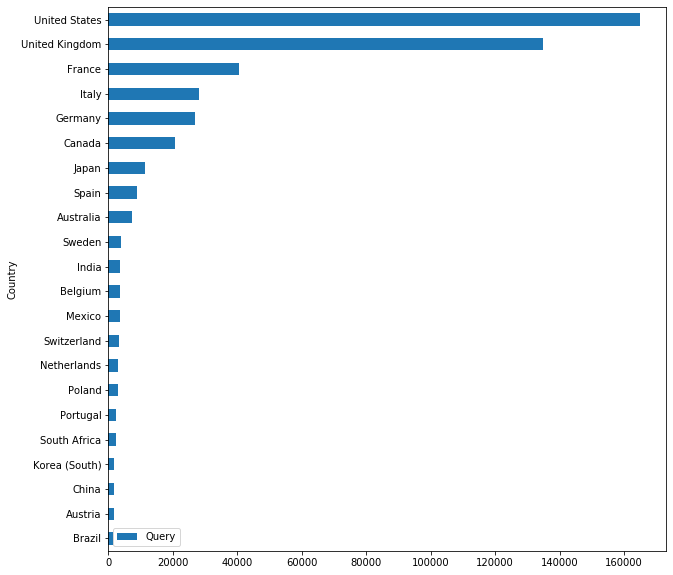

In [12]:
#### PLEASE DEFINE WHAT GREATER THAN VALUE YOU'D LIKE TO SEE FOR QUERY
q_value = 1000

df_country = df_country[df_country['Query'] > q_value]  
df_country.sort_values('Query',inplace=True)
df_country.plot(kind='barh',figsize=(10, 10))

In [13]:
#Convert Date to Datetime so groupby can work on dates
df['Date'] = pd.to_datetime(df['Date'])
#Grab date by day and list out
df_day = df.groupby(df['Date'].dt.strftime('%d'))['Query'].count().sort_values()
df_day

Date
10     9035
17     9241
11     9925
24    10087
18    10461
03    10743
25    11027
31    11382
04    11478
09    14754
16    15862
01    16434
02    16443
23    16528
08    17040
14    17101
07    17174
06    17569
12    17580
13    17834
20    17948
21    18147
26    18229
15    18352
22    18740
27    18799
05    18804
19    18897
28    19482
30    20351
29    24207
Name: Query, dtype: int64

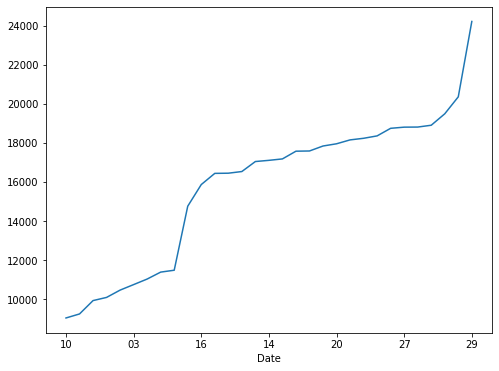

In [14]:
#Plot the above dataframe
df_day.plot(figsize=(8,6))